# Pressure to Height

This notebook demonstrates the transformation of ERA5 reanalysis pressure level data into geometric heights using geopotential to interpolate values across specified altitude levels.

Author: [Hamid Ali Syed](https://syedha.com) (@syedhamidali)

## Imports

In [1]:
import xarray as xr
import pressure_to_height as ph
import matplotlib.pyplot as plt


Transform ERA5 Pressure Levels to Geometric Height using Geopotential (z)
Author: [Hamid Ali Syed](https://github.com/syedhamidali) (@syedhamidali)
References: https://confluence.ecmwf.int/pages/viewpage.action?pageId=151531383



## Load Data

In [2]:
ds = xr.open_dataset("../Reanalyses/ERA5")
display(ds)

<xarray.Dataset> Size: 966MB
Dimensions:         (valid_time: 48, pressure_level: 37, latitude: 161,
                     longitude: 65)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 384B 2022-03-30 ... 2022-03-3...
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
  * latitude        (latitude) float64 1kB 65.0 64.75 64.5 ... 25.5 25.25 25.0
  * longitude       (longitude) float64 520B -80.0 -79.75 -79.5 ... -64.25 -64.0
    expver          (valid_time) <U4 768B ...
Data variables: (12/13)
    d               (valid_time, pressure_level, latitude, longitude) float32 74MB ...
    cc              (valid_time, pressure_level, latitude, longitude) float32 74MB ...
    z               (valid_time, pressure_level, latitude, longitude) float32 74MB ...
    pv              (valid_time, pressure_level, latitude, longitude) float32 74MB ...
    r               (valid_time, pressure_level, latitude, longitude) float32 74MB ...
    clwc            (valid_time, pressure_level, latitude, longitude) float32 74MB ...
    ...              ...
    crwc            (valid_time, pressure_level, latitude, longitude) float32 74MB ...
    t               (valid_time, pressure_level, latitude, longitude) float32 74MB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 74MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 74MB ...
    w               (valid_time, pressure_level, latitude, longitude) float32 74MB ...
    vo              (valid_time, pressure_level, latitude, longitude) float32 74MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-11T20:26 GRIB to CDM+CF via cfgrib-0.9.1...

## Transform

In [3]:
ds_alt = ph.pressure_to_height(ds)

In [4]:
display(ds_alt)

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 48, alt: 61, lat: 161, lon: 65)
Coordinates:
  * time     (time) datetime64[ns] 384B 2022-03-30 ... 2022-03-31T23:00:00
  * alt      (alt) int64 488B 0 250 500 750 1000 ... 14250 14500 14750 15000
  * lat      (lat) float64 1kB 65.0 64.75 64.5 64.25 ... 25.75 25.5 25.25 25.0
  * lon      (lon) float64 520B -80.0 -79.75 -79.5 -79.25 ... -64.5 -64.25 -64.0
Data variables:
    d        (time, alt, lat, lon) float32 123MB -6.32e-05 ... -3.593e-07
    cc       (time, alt, lat, lon) float32 123MB 0.266 0.1975 0.1216 ... 0.0 0.0
    pv       (time, alt, lat, lon) float32 123MB 3.951e-06 ... 4.87e-06
    r        (time, alt, lat, lon) float32 123MB 92.05 92.49 ... 25.38 25.72
    clwc     (time, alt, lat, lon) float32 123MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    q        (time, alt, lat, lon) float32 123MB 0.001512 0.001693 ... 4.217e-06
    crwc     (time, alt, lat, lon) float32 123MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    t        (time, alt, lat, lon) float32 123MB 263.5 264.6 ... 205.1 205.1
    u        (time, alt, lat, lon) float32 123MB -4.578 -5.392 ... 16.51 16.47
    v        (time, alt, lat, lon) float32 123MB -6.055 -5.335 ... -3.462 -2.503
    w        (time, alt, lat, lon) float32 123MB -0.03166 -0.0224 ... -0.01581
    vo       (time, alt, lat, lon) float32 123MB 6.337e-05 ... 5.193e-05

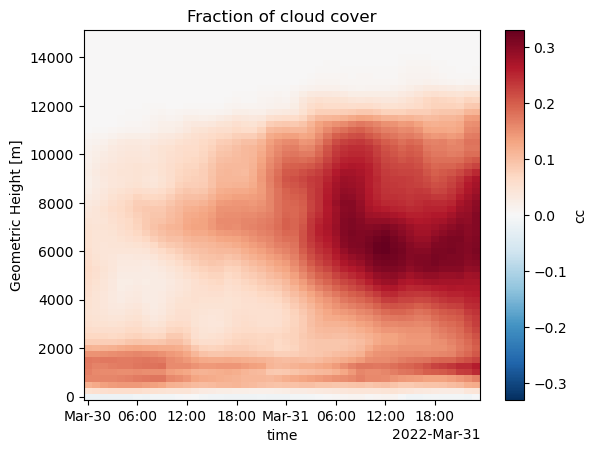

In [5]:
fig, ax = plt.subplots()
ds_alt['cc'].mean(['lat', 'lon']).plot(x='time', ax=ax)
ax.set_title(ds_alt['cc'].attrs['long_name'])
plt.show()

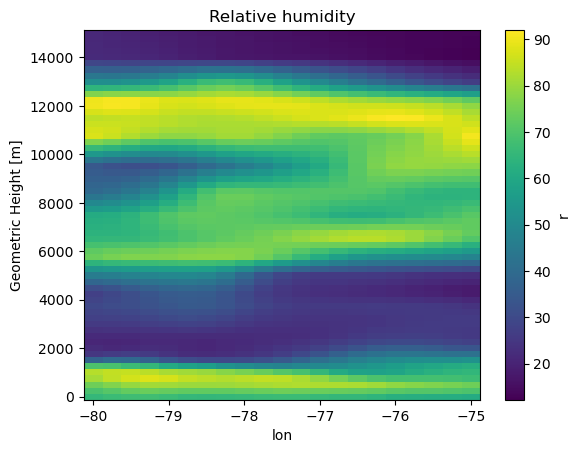

In [6]:
var = 'r'
fig, ax = plt.subplots()
ds_alt[var].isel(time=23).sel(lat=slice(35, 30), lon=slice(-80, -75)).mean('lat').plot(ax=ax)
ax.set_title(ds_alt[var].attrs['long_name'])
plt.show()

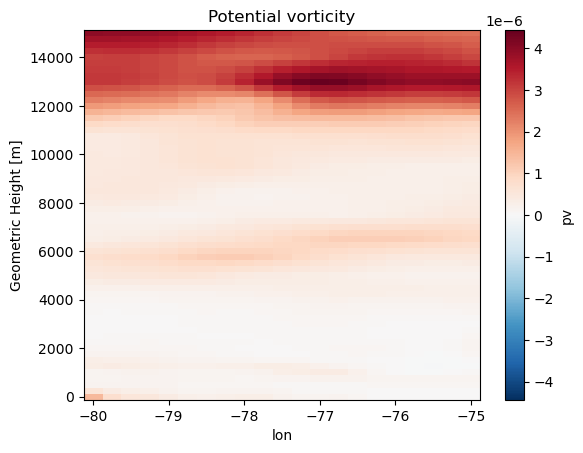

In [7]:
var = 'pv'
fig, ax = plt.subplots()
ds_alt[var].isel(time=23).sel(lat=slice(35, 30), lon=slice(-80, -75)).mean('lat').plot(ax=ax)
ax.set_title(ds_alt[var].attrs['long_name'])
plt.show()

In [8]:
help(ph.pressure_to_height)

Help on function pressure_to_height in module pressure_to_height:

pressure_to_height(ds, alt_max=15000, alt_res=250)
    Transform ERA5 pressure level data to geometric height for a dataset with multiple time steps.

    Parameters
    ----------
    ds : xarray.Dataset
        Pressure Level Dataset containing variables like 'z' (geopotential in m²/s²).
    alt_max : int, optional
        Maximum altitude in meters for interpolation. Default is 15000 m.
    alt_res : int, optional
        Resolution between altitude levels in meters. Default is 250 m.

    Returns
    -------
    xarray.Dataset
        Interpolated dataset on the new (alt, lat, lon) grid, with attributes preserved.

    Author
    ------
    Hamid Ali Syed (https://syedha.com, @syedhamidali)

    References
    ----------
    .. [1] https://confluence.ecmwf.int/pages/viewpage.action?pageId=151531383

    Example
    -------
    >>> ds = xr.open_mfdataset("path_to_era5_data/*.nc")
    >>> ds_full = pressure_to_height(

In [9]:
ds = ds.rename({'valid_time':'time',
                'pressure_level':'level',
                'latitude':'lat',
                'longitude':'lon'}
              ).drop_vars(['number', 'expver'], errors='ignore')

In [10]:
display(ds)

<xarray.Dataset> Size: 966MB
Dimensions:  (time: 48, level: 37, lat: 161, lon: 65)
Coordinates:
  * time     (time) datetime64[ns] 384B 2022-03-30 ... 2022-03-31T23:00:00
  * level    (level) float64 296B 1e+03 975.0 950.0 925.0 ... 5.0 3.0 2.0 1.0
  * lat      (lat) float64 1kB 65.0 64.75 64.5 64.25 ... 25.75 25.5 25.25 25.0
  * lon      (lon) float64 520B -80.0 -79.75 -79.5 -79.25 ... -64.5 -64.25 -64.0
Data variables: (12/13)
    d        (time, level, lat, lon) float32 74MB ...
    cc       (time, level, lat, lon) float32 74MB ...
    z        (time, level, lat, lon) float32 74MB ...
    pv       (time, level, lat, lon) float32 74MB ...
    r        (time, level, lat, lon) float32 74MB ...
    clwc     (time, level, lat, lon) float32 74MB ...
    ...       ...
    crwc     (time, level, lat, lon) float32 74MB ...
    t        (time, level, lat, lon) float32 74MB ...
    u        (time, level, lat, lon) float32 74MB ...
    v        (time, level, lat, lon) float32 74MB ...
    w        (time, level, lat, lon) float32 74MB ...
    vo       (time, level, lat, lon) float32 74MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-11T20:26 GRIB to CDM+CF via cfgrib-0.9.1...

In [11]:
ds_small = ph.pressure_to_height(ds.isel(time=slice(22, 25)))

In [12]:
ds_small['speed'] = (ds_small['u']**2 + ds_small['v']**2)**(0.5)

In [13]:
lat_stride = 5
lon_stride = 2
ds_stride = ds_small.sel(lat=slice(None, None, lat_stride), lon=slice(None, None, lon_stride))

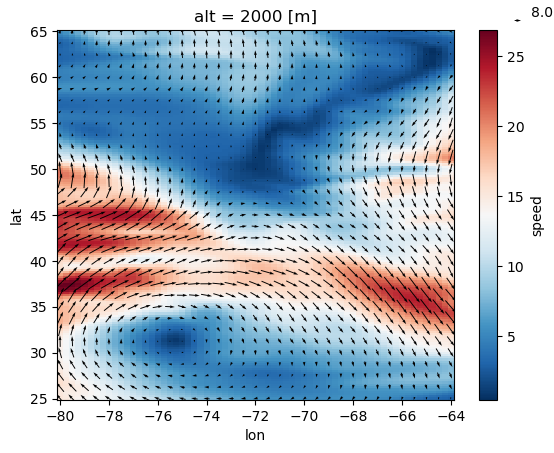

In [14]:
alt = 2000
ds_small['speed'].sel(alt=alt, method='nearest').mean('time').plot(x='lon', y='lat', cmap='RdBu_r')
ds_stride.sel(alt=alt, method='nearest').mean('time').plot.quiver(x='lon', y='lat', u='u', v='v', scale=500)

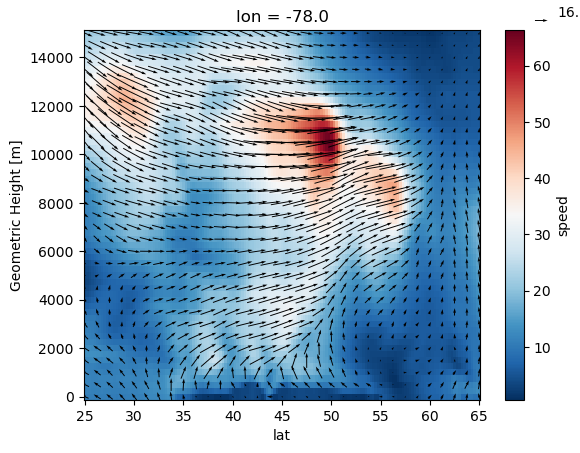

In [15]:
lat_stride = 5
alt_stride = 2
ds_stride = ds_small.sel(lat=slice(None, None, lat_stride), alt=slice(None, None, alt_stride))

ds_small['speed'].sel(lon=-78, method='nearest').mean('time').plot(x='lat', y='alt', cmap='RdBu_r')
ds_stride.sel(lon=-78, method='nearest').mean('time').plot.quiver(x='lat', y='alt', u='u', v='v', scale=500)

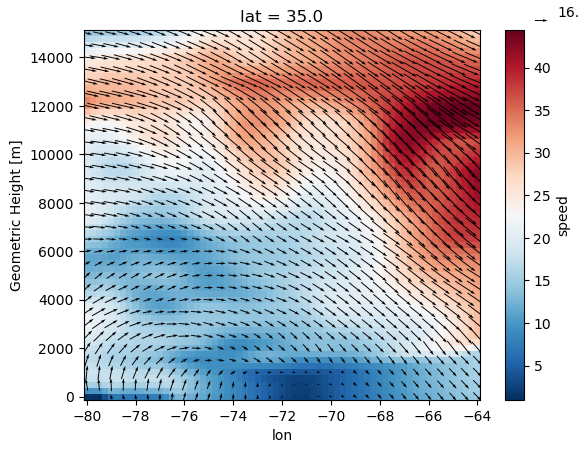

In [16]:
lon_stride = 2
alt_stride = 2
ds_stride = ds_small.sel(lon=slice(None, None, lon_stride), alt=slice(None, None, alt_stride))

ds_small['speed'].sel(lat=35, method='nearest').mean('time').plot(x='lon', y='alt', cmap='RdBu_r')
ds_stride.sel(lat=35, method='nearest').mean('time').plot.quiver(x='lon', y='alt', u='u', v='v', scale=500)

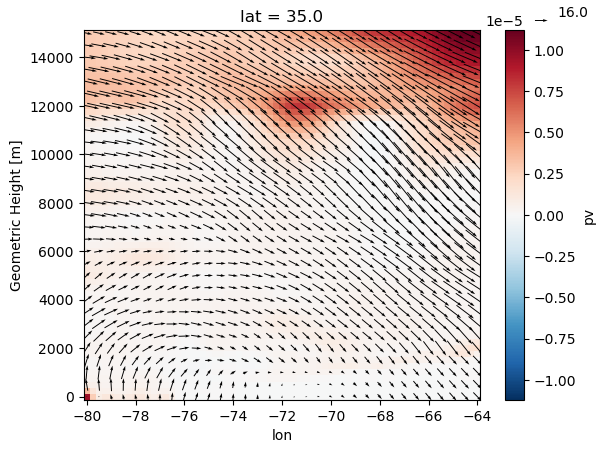

In [17]:
lon_stride = 2
alt_stride = 2
ds_stride = ds_small.sel(lon=slice(None, None, lon_stride), alt=slice(None, None, alt_stride))

ds_small['pv'].sel(lat=35, method='nearest').mean('time').plot(x='lon', y='alt', cmap='RdBu_r')
ds_stride.sel(lat=35, method='nearest').mean('time').plot.quiver(x='lon', y='alt', u='u', v='v', scale=500)